In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from scipy.spatial.distance import squareform, pdist

sns.set(style='whitegrid', context='notebook', palette='Set2')

In [2]:
# read CSV
df_data  = pd.read_csv('../../data/some.csv')
df_data = df_data.drop(columns=['Unnamed: 0'])

In [3]:
df_data.head()

,id,new_frame,frame,wx,wz,vel,dist
0,0,1,26.250000,-85.809775,660.082000,15.618800,8.356058
1,0,2,49.833333,-62.801800,682.939000,41.255759,32.431611
2,0,3,67.142857,-74.171171,665.800143,35.645760,20.567037
3,0,4,90.230769,-217.065846,489.702846,294.673615,226.779951
4,0,5,103.000000,-257.003714,370.991429,294.260843,125.249487


/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/tela/.anyenv/envs/pyenv/versions/3.6.4/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


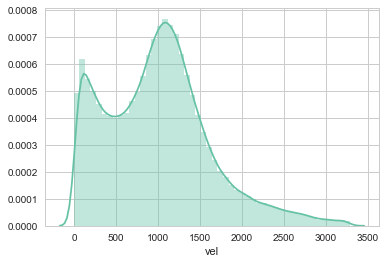

In [4]:
def drop_outlier(df):
  for i, col in df.iteritems():
    #四分位数
    q1 = col.describe()['25%']
    q3 = col.describe()['75%']
    iqr = q3 - q1 #四分位範囲

    #外れ値の基準点
    outlier_min = q1 - (iqr) * 1.5
    outlier_max = q3 + (iqr) * 1.5

    #範囲から外れている値を除く
    col[col < outlier_min] = None
    col[col > outlier_max] = None

drop_outlier(df_data)
df_data = df_data.dropna()
sns.distplot(df_data['vel'])

In [5]:
df_data.describe()

,id,new_frame,frame,wx,wz,vel,dist
count,208639.000000,208639.000000,2.086390e+05,208639.000000,208639.000000,208639.000000,208639.000000
mean,125197.024804,44418.060051,8.883693e+05,770.146590,4839.487286,1004.658858,565.992814
std,75191.590617,25435.062314,5.087011e+05,1473.139869,1764.048355,626.719202,361.399837
min,0.000000,1.000000,2.625000e+01,-4052.934000,183.629667,0.221536,0.147691
25%,63215.000000,22969.500000,4.593999e+05,-332.399340,3622.819766,521.573273,278.960361
50%,112724.000000,42326.000000,8.465275e+05,843.178882,4825.329333,996.784576,542.512261
75%,187160.000000,65984.500000,1.319700e+06,1896.399000,5899.369667,1350.307994,781.963935
max,282063.000000,94784.000000,1.895684e+06,6753.295000,12829.950000,3291.268103,1873.025338
